In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Read in CSV files

csv_path_1 = Path('Resources\healthcare-dataset-stroke-data.csv')
Health_Care = pd.read_csv(csv_path_1)

csv_path_2 = Path('Resources\Stroke Prediction.csv')
Stroke_Prediction = pd.read_csv(csv_path_2)

csv_path_3 = Path('Resources\stroke_prediction_dataset.csv')
Stroke_Prediction_2 = pd.read_csv(csv_path_3)

# Create a new DataFrame for Health_Care
Health_Care_df = pd.DataFrame(Health_Care)
Health_Care_df.head()

# Combine Stroke DataSets 1 & 2 into a single DataFrame
combined_prediction_df = pd.merge(Stroke_Prediction, Stroke_Prediction_2, how='outer', on='Patient ID')
combined_prediction_df.head()

,Patient ID,Patient Name_x,Age_x,Gender_x,Hypertension_x,Heart Disease_x,Marital Status_x,Work Type_x,Residence Type_x,Average Glucose Level_x,...,Alcohol Intake_y,Physical Activity_y,Stroke History_y,Family History of Stroke_y,Dietary Habits_y,Stress Levels_y,Blood Pressure Levels_y,Cholesterol Levels_y,Symptoms_y,Diagnosis_y
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [3]:
# Print info on Health_Care
Health_Care_df.info()

# Display DataFrame for HealthCare
Health_Care_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# Create a Clean DataFrame by dropping the NaN values (For Health_Care)
Health_Care_df = Health_Care.dropna()
Health_Care_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [6]:
# Print info on combined_prediction
combined_prediction_df.info()

# Display DataFrame for HealthCare
combined_prediction_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Patient ID                  15000 non-null  int64  
 1   Patient Name_x              15000 non-null  object 
 2   Age_x                       15000 non-null  int64  
 3   Gender_x                    15000 non-null  object 
 4   Hypertension_x              15000 non-null  int64  
 5   Heart Disease_x             15000 non-null  int64  
 6   Marital Status_x            15000 non-null  object 
 7   Work Type_x                 15000 non-null  object 
 8   Residence Type_x            15000 non-null  object 
 9   Average Glucose Level_x     15000 non-null  float64
 10  Body Mass Index (BMI)_x     15000 non-null  float64
 11  Smoking Status_x            15000 non-null  object 
 12  Alcohol Intake_x            15000 non-null  object 
 13  Physical Activity_x         150

,Patient ID,Patient Name_x,Age_x,Gender_x,Hypertension_x,Heart Disease_x,Marital Status_x,Work Type_x,Residence Type_x,Average Glucose Level_x,...,Alcohol Intake_y,Physical Activity_y,Stroke History_y,Family History of Stroke_y,Dietary Habits_y,Stress Levels_y,Blood Pressure Levels_y,Cholesterol Levels_y,Symptoms_y,Diagnosis_y
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,13981,Keya Iyer,88,Female,1,1,Divorced,Self-employed,Urban,160.22,...,Social Drinker,High,0,No,Paleo,1.12,171/92,"HDL: 44, LDL: 153",NaN,No Stroke
14996,87707,Anahita Virk,47,Female,0,0,Married,Private,Urban,107.58,...,Never,Low,1,No,Gluten-Free,1.47,155/71,"HDL: 35, LDL: 183",Difficulty Speaking,No Stroke
14997,33174,Ivana Kaur,35,Male,0,0,Married,Government Job,Rural,134.90,...,Rarely,High,1,No,Paleo,0.51,121/110,"HDL: 57, LDL: 159","Difficulty Speaking, Severe Fatigue, Headache",Stroke
14998,22343,Anvi Mannan,73,Male,0,0,Single,Self-employed,Urban,169.42,...,Never,High,0,Yes,Paleo,1.53,157/74,"HDL: 79, LDL: 91","Severe Fatigue, Numbness, Confusion, Dizziness...",No Stroke


In [7]:
# Create a Clean DataFrame by dropping the NaN values (For Health_Care)
combined_prediction_df = combined_prediction_df.dropna()
combined_prediction_df.head()

,Patient ID,Patient Name_x,Age_x,Gender_x,Hypertension_x,Heart Disease_x,Marital Status_x,Work Type_x,Residence Type_x,Average Glucose Level_x,...,Alcohol Intake_y,Physical Activity_y,Stroke History_y,Family History of Stroke_y,Dietary Habits_y,Stress Levels_y,Blood Pressure Levels_y,Cholesterol Levels_y,Symptoms_y,Diagnosis_y
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [8]:
# Find total number of people who had a stroke (Health_Care)
Health_Care_df['stroke'].sum()

209

In [49]:
# Find total number of people who had a stroke (combined_prediction)
combined_prediction_df['Diagnosis_y'].value_counts()
combined_prediction_stroke = combined_prediction_df.loc[combined_prediction_df['Diagnosis_y'] == 'Stroke']
print(combined_prediction_stroke['Diagnosis_y'].count())

6249


In [14]:
# Define function for gathering BMI category & stroke data
def print_bmi(df):
    
# Find total number of people with BMI in underweight range (Health_Care)    
    underweight_bmi = df['bmi'] < 18.5
    underweight_bmi.count()
    
# Find total number of people with BMI in healthy range (Health_Care)
    healthy_bmi = df.loc[(df['bmi'] > 18.4) & (df['bmi']< 25.0), "id"]
    healthy_bmi.count()

# Find total number of people with BMI in overweight range (Health_Care)
    overweight_bmi = df.loc[(df['bmi'] > 24.9) & (df['bmi'] < 30.0), "id"]
    overweight_bmi.count()

# Find total number of people with BMI in obese class 1 range (Health_Care)
    obese_class_1_bmi = df.loc[(df['bmi'] > 29.9) & (df['bmi'] > 35.0), "id"]
    obese_class_1_bmi.count()

# Find total number of people with BMI in obese class 2 range (Health_Care)
    obese_class_2_bmi = df.loc[(df['bmi'] > 34.9) & (df['bmi'] < 40.0), "id"]
    obese_class_2_bmi.count()

# Find total number of people with BMI in obese class 3 range (Health_Care)    
    obese_class_3_bmi = df['bmi'] >= 70
    obese_class_3_bmi.count()

    print(f'Total Number at Underweight BMI: {underweight_bmi.count()}')
    print(f'Total Number at Healthy BMI: {healthy_bmi.count()}')
    print(f'Total Number at Overweight BMI: {overweight_bmi.count()}')
    print(f'Total Number at Obese Class 1 BMI: {obese_class_1_bmi.count()}')
    print(f'Total Number at Obese Class 2 BMI: {obese_class_2_bmi.count()}')
    print(f'Total Number at Obese Class 3 BMI: {obese_class_3_bmi.count()}')
    return {
       'Underweight BMI': underweight_bmi.count(), 
       'Healthy BMI': healthy_bmi.count(),
       'Overweight BMI': overweight_bmi.count(),
       'Obese Class 1 BMI': obese_class_1_bmi.count(),
       'Obese Class 2 BMI': obese_class_2_bmi.count(),
       'Obese Class 3 BMI': obese_class_3_bmi.count(),
    }

# Set variable for data from all BMI Categories
all_bmis = print_bmi(Health_Care_df)
all_bmis

Total Number at Underweight BMI: 4909
Total Number at Healthy BMI: 1243
Total Number at Overweight BMI: 1409
Total Number at Obese Class 1 BMI: 908
Total Number at Obese Class 2 BMI: 506
Total Number at Obese Class 3 BMI: 4909


{'Underweight BMI': 4909,
 'Healthy BMI': 1243,
 'Overweight BMI': 1409,
 'Obese Class 1 BMI': 908,
 'Obese Class 2 BMI': 506,
 'Obese Class 3 BMI': 4909}

In [15]:
# Find number of people in each BMI category who have had a stroke (Health_Care)
stroke_df = Health_Care_df.loc[Health_Care_df['stroke']==1]
print("BMI Category for People Who Have Had a Stroke")
stroke_bmi = print_bmi(stroke_df)
stroke_bmi


BMI Category for People Who Have Had a Stroke
Total Number at Underweight BMI: 209
Total Number at Healthy BMI: 35
Total Number at Overweight BMI: 75
Total Number at Obese Class 1 BMI: 42
Total Number at Obese Class 2 BMI: 23
Total Number at Obese Class 3 BMI: 209


{'Underweight BMI': 209,
 'Healthy BMI': 35,
 'Overweight BMI': 75,
 'Obese Class 1 BMI': 42,
 'Obese Class 2 BMI': 23,
 'Obese Class 3 BMI': 209}

In [16]:
# Find number of people in each BMI category who have not had a stroke (Health_Care)
no_stroke_df = Health_Care_df.loc[Health_Care_df['stroke']==0]
print("BMI Category for People Who Have Not Had a Stroke")
no_stroke_bmi = print_bmi(no_stroke_df)
no_stroke_bmi

BMI Category for People Who Have Not Had a Stroke
Total Number at Underweight BMI: 4700
Total Number at Healthy BMI: 1208
Total Number at Overweight BMI: 1334
Total Number at Obese Class 1 BMI: 866
Total Number at Obese Class 2 BMI: 483
Total Number at Obese Class 3 BMI: 4700


{'Underweight BMI': 4700,
 'Healthy BMI': 1208,
 'Overweight BMI': 1334,
 'Obese Class 1 BMI': 866,
 'Obese Class 2 BMI': 483,
 'Obese Class 3 BMI': 4700}

<Axes: >

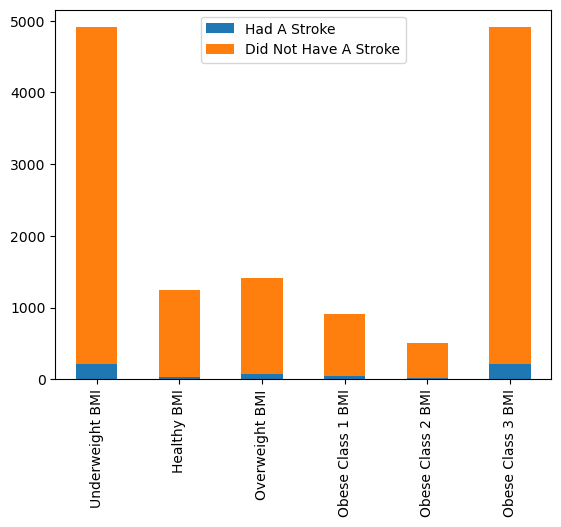

In [17]:
# Gather keys for stacked bar graph showing Strokes per BMI category
my_index = list(all_bmis.keys())

# Gather values for stacked bar graph showing Strokes per BMI category
my_data = {
    'Had A Stroke': list(stroke_bmi.values()),
    'Did Not Have A Stroke': list(no_stroke_bmi.values())
}

# Plot stacked bar graph
bmi_df = pd.DataFrame(my_data, index = my_index)
bmi_df.plot.bar(stacked=True)


In [18]:
# Define function for gathering age group & stroke data
def print_age(df):
    
# Find total number of people in the 40-49 age range (Health_Care) 
    fourty_somethings = df.loc[(df['age'] > 39) & (df['age'] < 50), 'id']
    fourty_somethings.count()

# Find total number of people in the 50-59 age range (Health_Care)
    fifty_somethings = df.loc[(df['age'] > 49) & (df['age'] < 60), 'id']
    fifty_somethings.count()

# Find total number of people in the 60-69 age range (Health_Care)
    sixty_somethings = df.loc[(df['age'] > 59) & (df['age'] < 70), 'id']
    sixty_somethings.count()

# Find total number of people in the 70-79 age range (Health_Care)
    seventy_somethings = df.loc[(df['age'] > 69) & (df['age'] < 80), 'id']
    seventy_somethings.count()

# Find total number of people in the 80 and over age range (Health_Care)
    eighty_and_overs = df['age'] > 79
    eighty_and_overs.count()

    print(f'Total Number Age 40 to 49: {fourty_somethings.count()}')
    print(f'Total Number Age 50 to 59: {fifty_somethings.count()}')
    print(f'Total Number Age 60 to 69: {sixty_somethings.count()}')
    print(f'Total Number Age 70 to 79: {seventy_somethings.count()}')
    print(f'Total Number Age Over 80: {eighty_and_overs.count()}')
    return {
       'Age 40 to 49': fourty_somethings.count(), 
       'Age 50 to 59': fifty_somethings.count(),
       'Age 60 to 69': sixty_somethings.count(),
       'Age 70 to 79': seventy_somethings.count(),
       'Age Over 80': eighty_and_overs.count(),
    }

# Set variable for data from all age groups
all_ages = print_age(Health_Care_df)
all_ages

Total Number Age 40 to 49: 705
Total Number Age 50 to 59: 805
Total Number Age 60 to 69: 590
Total Number Age 70 to 79: 513
Total Number Age Over 80: 4909


{'Age 40 to 49': 705,
 'Age 50 to 59': 805,
 'Age 60 to 69': 590,
 'Age 70 to 79': 513,
 'Age Over 80': 4909}

In [19]:
# Find number of people in each age group who have had a stroke (Health_Care)
print("Age Group for People Who Have Had a Stroke")
stroke_age = print_age(stroke_df)
stroke_age


Age Group for People Who Have Had a Stroke
Total Number Age 40 to 49: 12
Total Number Age 50 to 59: 41
Total Number Age 60 to 69: 40
Total Number Age 70 to 79: 71
Total Number Age Over 80: 209


{'Age 40 to 49': 12,
 'Age 50 to 59': 41,
 'Age 60 to 69': 40,
 'Age 70 to 79': 71,
 'Age Over 80': 209}

In [20]:
# Find number of people in each age group who have not had a stroke (Health_Care)
print("Age Group for People Who Have Not Had a Stroke")
no_stroke_age = print_age(no_stroke_df)
no_stroke_age

Age Group for People Who Have Not Had a Stroke
Total Number Age 40 to 49: 693
Total Number Age 50 to 59: 764
Total Number Age 60 to 69: 550
Total Number Age 70 to 79: 442
Total Number Age Over 80: 4700


{'Age 40 to 49': 693,
 'Age 50 to 59': 764,
 'Age 60 to 69': 550,
 'Age 70 to 79': 442,
 'Age Over 80': 4700}

<Axes: >

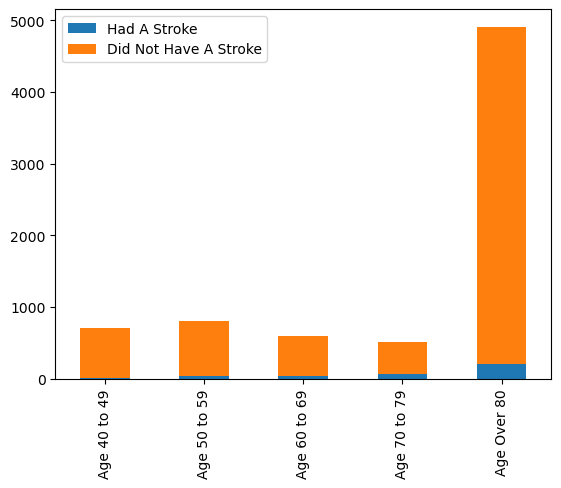

In [21]:
# Gather keys for bar graph showing strokes per age group
age_index = list(all_ages.keys())

# Gather values for bar graph showing strokes per age group
age_data = {
    'Had A Stroke': list(stroke_age.values()),
    'Did Not Have A Stroke': list(no_stroke_age.values())
}

# Plot stacked bar graph
age_df = pd.DataFrame(age_data, index = age_index)
age_df.plot.bar(stacked=True)

In [22]:
# Define function for gathering glucose level & stroke data
def print_glucose(df):
    
# Find total number of people with low glucose level (Health_Care)    
    low_glucose = df['avg_glucose_level'] < 70
    low_glucose.count()

# Find total number of people with normal glucose level (Health_Care)   
    normal_glucose = df.loc[(df['avg_glucose_level'] >= 70) & (df['avg_glucose_level'] <= 99), 'id']
    normal_glucose.count()

# Find total number of people with pre-diabetic glucose level (Health_Care)   
    pre_diabetic_glucose = df.loc[(df['avg_glucose_level'] >= 100) & (df['avg_glucose_level'] < 126), 'id']
    pre_diabetic_glucose.count()

# Find total number of people with diabetic glucose level (Health_Care)   
    diabetic_glucose = df['avg_glucose_level'] >= 126
    diabetic_glucose.count()

    print(f'Total number with low glucose: {low_glucose.count()}')
    print(f'Total number with normal glucose: {normal_glucose.count()}')
    print(f'Total number with pre-diabetic glucose: {pre_diabetic_glucose.count()}')
    print(f'Total number with diabetic glucose: {diabetic_glucose.count()}')
    
    return {
       'Low Glucose': low_glucose.count(), 
       'Normal Glucose': normal_glucose.count(),
       'Pre-Diabetic Glucose': pre_diabetic_glucose.count(),
       'Diabetic Glucose': diabetic_glucose.count(),
    }
 
# Set variable for data from all glucose levels
all_levels = print_glucose(Health_Care_df)
all_levels

Total number with low glucose: 4909
Total number with normal glucose: 2234
Total number with pre-diabetic glucose: 964
Total number with diabetic glucose: 4909


{'Low Glucose': 4909,
 'Normal Glucose': 2234,
 'Pre-Diabetic Glucose': 964,
 'Diabetic Glucose': 4909}

In [23]:
# Find number of people in each glucose range who have had a stroke (Health_Care)
print("Glucose Levels for People Who Have Had a Stroke")
stroke_glucose = print_glucose(stroke_df)
stroke_glucose


Glucose Levels for People Who Have Had a Stroke
Total number with low glucose: 209
Total number with normal glucose: 72
Total number with pre-diabetic glucose: 29
Total number with diabetic glucose: 209


{'Low Glucose': 209,
 'Normal Glucose': 72,
 'Pre-Diabetic Glucose': 29,
 'Diabetic Glucose': 209}

In [24]:
# Find number of people in each glucose range who have not had a stroke (Health_Care)
print("Glucose Levels for People Who Have Not Had a Stroke")
no_stroke_glucose = print_glucose(no_stroke_df)
no_stroke_glucose

Glucose Levels for People Who Have Not Had a Stroke
Total number with low glucose: 4700
Total number with normal glucose: 2162
Total number with pre-diabetic glucose: 935
Total number with diabetic glucose: 4700


{'Low Glucose': 4700,
 'Normal Glucose': 2162,
 'Pre-Diabetic Glucose': 935,
 'Diabetic Glucose': 4700}

<Axes: >

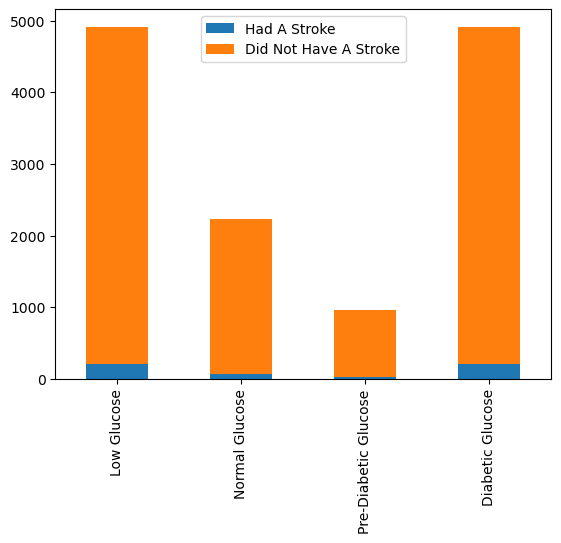

In [25]:
# Gather keys for bar graph showing strokes per glucose level
glucose_index = list(all_levels.keys())

# Gather values for bar graph showing strokes per glucose level
glucose_data = {
    'Had A Stroke': list(stroke_glucose.values()),
    'Did Not Have A Stroke': list(no_stroke_glucose.values())
}

# Plot stacked bar graph
glucose_df = pd.DataFrame(glucose_data, index = glucose_index)
glucose_df.plot.bar(stacked=True)

In [41]:
# Define function for gathering activity level & stroke data

def print_activity(df):
    
# Find total number of people with low physical activity level (combined_prediction) 
    low_activity = df.loc[(df['Physical Activity_y']=='Low'), 'Patient ID']
    low_activity.count()

# Find total number of people with moderate physical activity level (combined_prediction) 
    moderate_activity = df.loc[(df['Physical Activity_y']=='Moderate'), 'Patient ID']
    moderate_activity.count()

# Find total number of people with high physical activity level (combined_prediction) 
    high_activity = df.loc[(df['Physical Activity_y']=='High'), 'Patient ID']
    high_activity.count()

    print(f'Total Number With Low Activity Level: {low_activity.count()}')
    print(f'Total Number With Moderate Activity Level: {moderate_activity.count()}')
    print(f'Total Number With High Activity Level : {high_activity.count()}')

    return {
       'Low Phyical Activity': low_activity.count(), 
       'Moderate Physical Activity': moderate_activity.count(),
       'High Physical Activity': high_activity.count(),
    }

# Set variable for data from all age groups
all_activities = print_activity(combined_prediction_df)
all_activities

Total Number With Low Activity Level: 4097
Total Number With Moderate Activity Level: 4192
Total Number With High Activity Level : 4211


{'Low Phyical Activity': 4097,
 'Moderate Physical Activity': 4192,
 'High Physical Activity': 4211}

In [43]:
# Find number of people in each activity level group who have had a stroke (combined_prediction)
stroke_df = combined_prediction_df.loc[combined_prediction_df['Diagnosis_y']=='Stroke']
print("Activity Level for People Who Have Had a Stroke")
stroke_activity = print_activity(stroke_df)
stroke_activity

Activity Level for People Who Have Had a Stroke
Total Number With Low Activity Level: 2048
Total Number With Moderate Activity Level: 2108
Total Number With High Activity Level : 2093


{'Low Phyical Activity': 2048,
 'Moderate Physical Activity': 2108,
 'High Physical Activity': 2093}

In [44]:
# Find number of people in each activity level group who have not had a stroke (combined_prediction)
no_stroke_df = combined_prediction_df.loc[combined_prediction_df['Diagnosis_y']=='No Stroke']
print("Activity Level for People Who Have Not Had a Stroke")
no_stroke_activity = print_activity(no_stroke_df)
no_stroke_activity

Activity Level for People Who Have Not Had a Stroke
Total Number With Low Activity Level: 2049
Total Number With Moderate Activity Level: 2084
Total Number With High Activity Level : 2118


{'Low Phyical Activity': 2049,
 'Moderate Physical Activity': 2084,
 'High Physical Activity': 2118}

<Axes: >

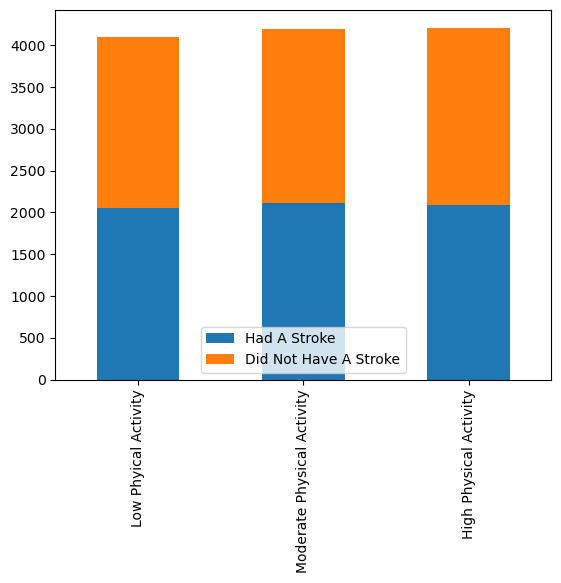

In [45]:
# Gather keys for bar graph showing strokes per activity level
activity_index = list(all_activities.keys())

# Gather values for bar graph showing strokes per activity level
activity_data = {
    'Had A Stroke': list(stroke_activity.values()),
    'Did Not Have A Stroke': list(no_stroke_activity.values())
}

# Plot stacked bar graph
activity_df = pd.DataFrame(activity_data, index = activity_index)
activity_df.plot.bar(stacked=True)